## Binary classification by machine learning

In [1]:
# Import the libraries related to the numerical calculation and the data frame manipulation.

import numpy as np 
import pandas as pd
import scipy as sp
from scipy import stats

In [2]:
# Import libraries offering the access to resources by URL

import urllib.request

In [3]:
# Import libraries to draw figures and graphs.

%matplotlib inline
import matplotlib.pyplot as plt 
from pandas import plotting

In [21]:
# Groups of libraries related to machine learning.

from sklearn.model_selection import train_test_split # Divide the training and test data.
from sklearn.metrics import confusion_matrix # Confusion matrix

from sklearn.decomposition import PCA # Principal Component Analysis
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K neighbors Classifier method
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # Naive bayes 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # Linear Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA # Quadratic Discriminant Analysis

### Read data of "Wine quality"

Details:

1. fixed acidity : 不揮発酸濃度（ほぼ酒石酸濃度）
2. volatile acidity : 揮発酸濃度（ほぼ酢酸濃度）
3. citric acid : クエン酸濃度
4. residual sugar : 残存糖濃度
5. chlorides : 塩化物濃度
6. free sulfur dioxide : 遊離亜硫酸濃度
7. total sulfur dioxide : 亜硫酸濃度
8. density : 密度
9. pH : pH
10. sulphates : 硫酸塩濃度
11. alcohol : アルコール度数
12. quality (score between 0 and 10) : 0-10 の値で示される品質のスコア

In [5]:
# Decide the resources on the web.

url = "https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt"

# Download resources from the url, and then name them.
urllib.request.urlretrieve(url, 'winequality-red.txt')

('winequality-red.txt', <http.client.HTTPMessage at 0x14c72ed30>)

In [6]:
# Read the data.

df1 = pd.read_csv('winequality-red.txt', sep='\t', index_col=0)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Separate two gropus

Firstly, we divide data into "good quality (more than 6)" and  "not good quality (less than 6)". Then, we predict the quality by variables such as 'pH' and 'volatile acidity'.

In [7]:
# Extract data lines whose value of quality is less than 6, and show the first 5 lines in the dataset.
df1[df1['quality'] < 6].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Extract data lines whose value of quality is more than 6, and show the first 5 lines in the dataset.
df1[df1['quality'] >= 6].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,6


<Axes: >

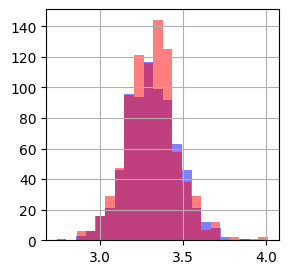

In [9]:
# Blue: less than 6, Red:more than 6 as pH distribution.
df1[df1['quality'] <  6]['pH'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='blue')
df1[df1['quality'] >= 6]['pH'].hist(figsize=(3, 3), bins=20, alpha=0.5, color='red')


In [10]:
# Add the row of class which defines wines class as 0 and 1, 0: quality score is less than 6, 1: quality score is more than 6.

df1['class'] = [0 if i <= 5 else 1 for i in df1['quality'].tolist()]
df1.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [11]:
# Decide colors for each pattern.

color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df1['class'].tolist()]

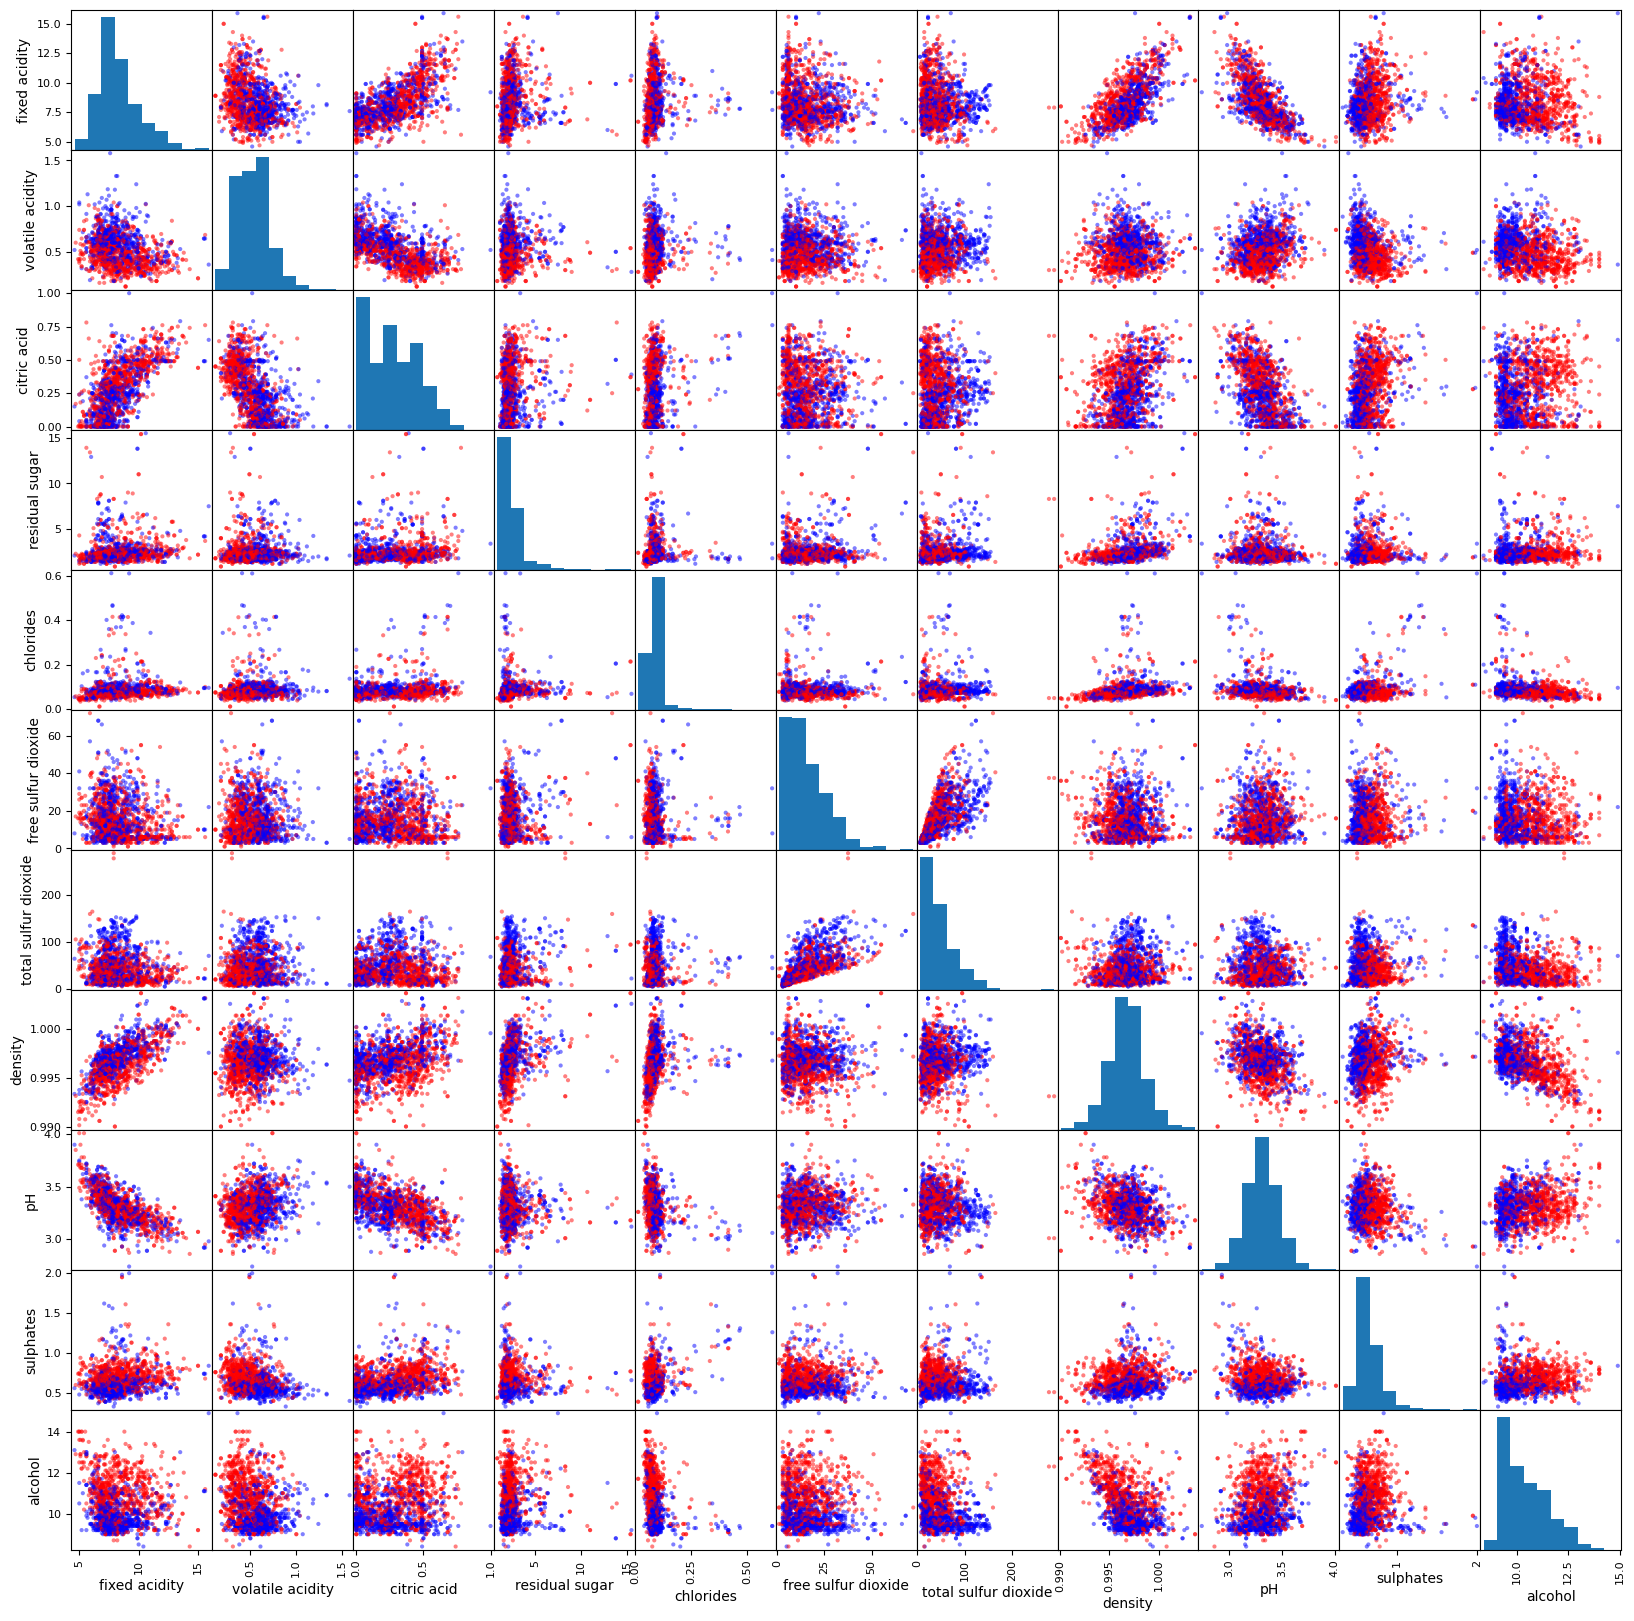

In [12]:
# Draw the scatter matrix.

plotting.scatter_matrix(df1.dropna(axis=1)[df1.columns[:11]], figsize=(20, 20), color=colors, alpha=0.5) 
plt.show()

In [13]:
# PCA

dfs = df1.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0) # Visualize the data

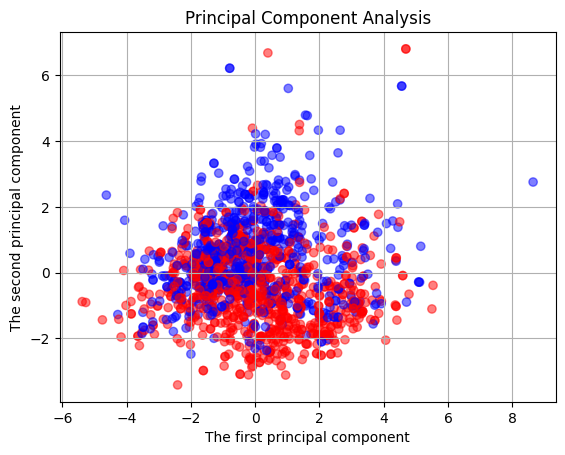

In [14]:
pca = PCA()
pca.fit(dfs.iloc[:, :11])
# Map the data into the principal component space. = compress the dimension.
feature = pca.transform(dfs.iloc[:, :11])
#plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.title("Principal Component Analysis")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid()
plt.show()

### Divide the explanatory variable and object variable.

In [15]:
X = dfs.iloc[:, :11] # Explanatory variable
y = df1.iloc[:, 12] # Object variable

### Divide the train data and test data,

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # train : test = 6 : 4

### Logistic regression

In [17]:
clf = LogisticRegression() # Create model.
clf.fit(X_train, y_train) # training

# The ratio of correct answer (train) : confirm the ratio of correct answer for train data.
clf.score(X_train, y_train)

0.762252346193952

In [18]:
# The ratio of correct answer (test) : confirm the ratio of correct answer for test data.
clf.score(X_test, y_test)

0.7203125

In [19]:
y_predict = clf.predict(X_test)
pd.DataFrame(y_predict).T

# Confusion matrix, which refers the correct ratio of prediction and answer.

pd.DataFrame(confusion_matrix(y_predict, y_test), index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])

,real 0,real 1
predicted 0,214,94
predicted 1,85,247


### Compare the various machine learning methods.

Gather several classifier into the list named "classifier".

In [22]:
names = ["Logistic Regression", "Nearest Neighbors", 
         "Linear SVM", "Polynomial SVM", "RBF SVM", "Sigmoid SVM", 
         "Decision Tree","Random Forest", "AdaBoost", "Naive Bayes", 
         "Linear Discriminant Analysis","Quadratic Discriminant Analysis"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    SVC(kernel="sigmoid"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]


In [32]:
result  = []

for name, clf in zip(names, classifiers): # Call classifiers in order.
    clf.fit(X_train, y_train) # Training
    score1 = clf.score(X_train, y_train) # Calculate the rate of correct answer for training data.
    score2 = clf.score(X_test, y_test) # Calculate the rate of correct answer for test data.
    result.append([score1, score2]) # Append results.

# Order classifiers from bigger rate of correct answer for test data.
df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort_values('test', ascending=False)

# Confirm result
df_result

,train,test
Random Forest,1.000000,0.770312
Decision Tree,1.000000,0.739062
Linear SVM,0.764338,0.723437
AdaBoost,0.822732,0.721875
Logistic Regression,0.762252,0.720313
Linear Discriminant Analysis,0.759124,0.720313
RBF SVM,0.820647,0.718750
Polynomial SVM,0.812304,0.715625
Nearest Neighbors,0.832117,0.700000
Naive Bayes,0.759124,0.690625


<Axes: >

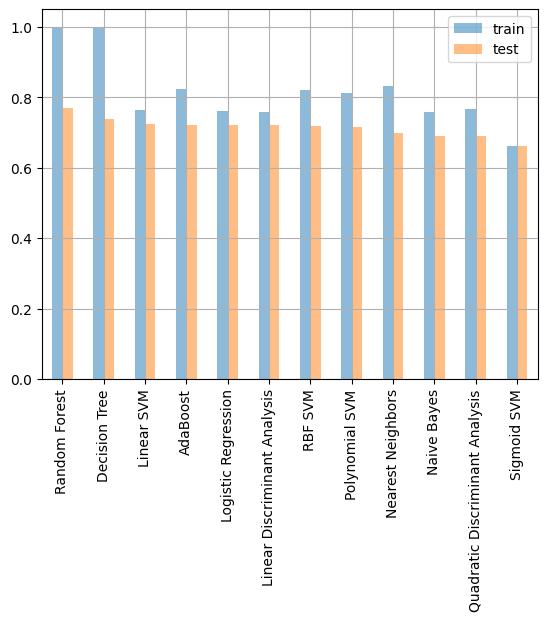

In [34]:
# Draw the bar graphs.
df_result.plot(kind='bar', alpha=0.5, grid=True)

In [37]:
# Calculate the rate of correct answer when the creation of data is occurred several times.

result = []

# Repeat 20 times
for trial in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score1 = clf.score(X_train, y_train)
        score2 = clf.score(X_test, y_test)
        result.append([name, score1, score2])

# Show results.
df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test'])        

In [41]:
# Calculate the mean of the rate og correct answer for each classifier by grouping, then sort the rate of correct answer for test data.
df_result_mean = df_result.groupby('classifier').mean().sort_values('test', ascending=False)
df_result_mean

,train,test
classifier,,
Random Forest,1.000000,0.794219
RBF SVM,0.802033,0.757188
Logistic Regression,0.747758,0.743516
Linear Discriminant Analysis,0.747497,0.743203
AdaBoost,0.806569,0.742031
Polynomial SVM,0.799166,0.741953
Linear SVM,0.747497,0.739297
Decision Tree,1.000000,0.734453
Naive Bayes,0.732795,0.728828


In [43]:
# For displaying the error bars, calculate the standard deviations.
errors = df_result.groupby('classifier').std()
errors

,train,test
classifier,,
AdaBoost,0.011465,0.015926
Decision Tree,0.000000,0.017513
Linear Discriminant Analysis,0.011344,0.017379
Linear SVM,0.012857,0.014782
Logistic Regression,0.010438,0.018997
Naive Bayes,0.009027,0.017955
Nearest Neighbors,0.013481,0.010338
Polynomial SVM,0.009261,0.016546
Quadratic Discriminant Analysis,0.014144,0.023054


<Axes: xlabel='classifier'>

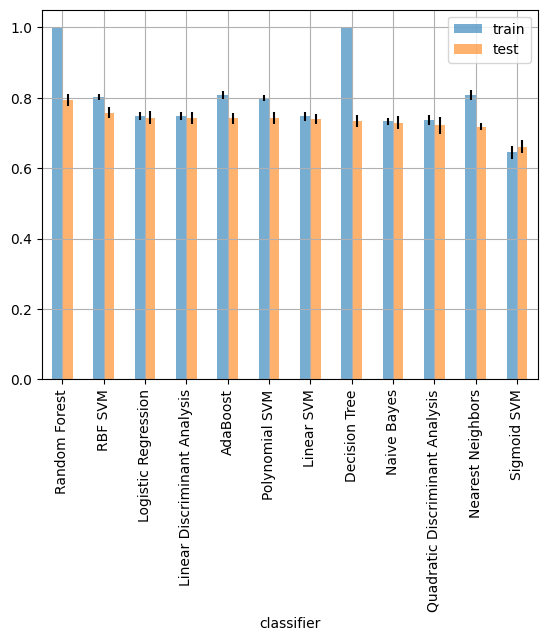

In [45]:
# Draw the bar graphs with the mean and the standar deviations.
df_result_mean.plot(kind='bar', alpha=0.6, grid=True, yerr=errors)